In [1]:
import torch

import dgl
import dgllife
from torch.utils.data import DataLoader
from dgllife.utils import smiles_to_bigraph, CanonicalAtomFeaturizer, CanonicalBondFeaturizer
import torch.optim as optim
import numpy as np
import random 
import pandas as pd

from torch.nn.utils import clip_grad_norm

Using backend: pytorch


In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
train_pd = pd.read_csv('./Dataset/acidic_train_0.70_FP.csv',header = None)
val_pd = pd.read_csv('./Dataset/acidic_val_0.15_FP.csv',header = None)
test_pd = pd.read_csv('./Dataset/acidic_test_0.15_FP.csv',header = None)

In [4]:
all_acidic_data = np.concatenate((np.array(train_pd)[:,1:],np.array(val_pd)[:,1:],np.array(test_pd)[:,1:]), axis=0)

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
from sklearn.neural_network._base import ACTIVATIONS

In [6]:
def deepest_layer(data, MLP, layer=0):
    L = ACTIVATIONS['relu'](np.matmul(data, MLP.coefs_[layer]) + MLP.intercepts_[layer])
    layer += 1
    if layer >= len(MLP.coefs_)-1:
        return L
    else:
        return deepest_layer(L, MLP, layer=layer)


In [7]:
with open("./Machine_learning_model/acidic_MLP_1.pickle", 'rb') as fr:
    model = pickle.load(fr)

In [8]:
L = deepest_layer(all_acidic_data, model)

In [9]:
L.shape

(9053, 200)

In [12]:
test_sample = pd.read_csv('./Dataset/sample_test.csv')
test_sample

,Name,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,AD2D771,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780
0,AUTOGEN_pka_test_moleucle_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_pka_test_moleucle_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_pka_test_moleucle_3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,AUTOGEN_pka_test_moleucle_4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_pka_test_moleucle_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AUTOGEN_pka_test_moleucle_6,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,AUTOGEN_pka_test_moleucle_7,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AUTOGEN_pka_test_moleucle_8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,AUTOGEN_pka_test_moleucle_9,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,AUTOGEN_pka_test_moleucle_10,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_sample_jz = np.array(test_sample)
test_sample_jz = test_sample_jz[:,1:].astype('float')
test_sample_jz.shape

(11, 9121)

In [24]:
test_sample_jz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [31]:
test_sample_hidden = deepest_layer(test_sample_jz, model)
test_sample_hidden

array([[0.70415075, 0.        , 0.55015876, ..., 1.09721299, 0.        ,
        0.        ],
       [1.24774573, 0.        , 1.78559649, ..., 1.83529821, 0.        ,
        0.        ],
       [0.71831307, 0.        , 0.23599932, ..., 1.00589965, 0.        ,
        0.        ],
       ...,
       [1.37853378, 0.        , 2.56770519, ..., 1.80258436, 0.        ,
        0.        ],
       [1.1984585 , 0.        , 0.99479027, ..., 1.12209833, 0.        ,
        0.        ],
       [1.21825041, 0.        , 2.83509898, ..., 2.68548862, 0.        ,
        0.        ]])

In [91]:
smiles_lis = []
pka_lis = []
with open('./Dataset/acidic_train_0.70_smiles.txt') as f:
    for line in f.readlines():
        line = line.replace('/n','').split('\t')
        #print(line)
        smiles_lis.append(line[0])
        pka_lis.append(line[1])
with open('./Dataset/acidic_val_0.15_smiles.txt') as f:
    for line in f.readlines():
        line = line.replace('/n','').split('\t')
        #print(line)
        smiles_lis.append(line[0])
        pka_lis.append(line[1])
with open('./Dataset/acidic_test_0.15_smiles.txt') as f:
    for line in f.readlines():
        line = line.replace('/n','').split('\t')
        #print(line)
        smiles_lis.append(line[0])
        pka_lis.append(line[1])

In [217]:
model.predict(test_sample_jz)

array([ 4.21002203,  7.69478085,  2.88215218,  7.26196098,  3.90579363,
        6.67247083,  6.68469951,  4.30559579,  9.75645115,  5.16529155,
       10.36842926])

In [231]:
d_jz = np.sum((L - test_sample_hidden[3]) ** 2,axis = 1)

In [232]:
d_jz.argsort()[:10]

array([1454, 8615, 3934,  640, 7947, 5069, 5585, 6748, 8540, 3379])

In [249]:
id_ = 5069
d_jz[id_]

1.422995223464441

C[n+]1csc2cc(O)ccc21
7.2699999810000016



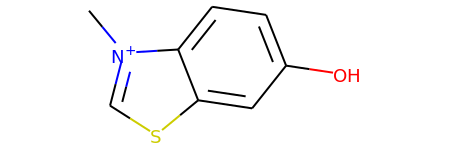

In [250]:
from rdkit import Chem
smiles_ = smiles_lis[id_]
print(smiles_)
print(pka_lis[id_])
Chem.MolFromSmiles(smiles_)